
| ![SDG15.9](https://images.prismic.io/globalgoals%2F4873dc0f-0980-46f0-8186-a4a6b3d9e693_goal_15.9_rgb_ng.svg?auto=compress,format) | **15.9: Integrate Ecosystem and Biodiversity in government planning** | ![SDG15.9](https://images.prismic.io/globalgoals%2F4873dc0f-0980-46f0-8186-a4a6b3d9e693_goal_15.9_rgb_ng.svg?auto=compress,format) | **15.9: Integrate Ecosystem and Biodiversity in government planning** | 
|:---:|:---:|:---:|:---:|
|

# Using satellite data to monitor urban green space

## 1. Introduction
In this activity, we will look at the use of satellite data to monitor urban green spaces through a mixture of information and experimentation with real data. This will take you about 1 hour to work through.

## 2. How to use this resource 
This is a [Jupyter Notebook](https://jupyter.org/). It brings together text, images and code, allowing us to try out techniques alongside the relevant information. This activity is written in the [Python](https://www.python.org/) programming language. You don't need to know Python to use this resource, however if you would like more information on how to use Jupyter Notebooks, [there is a useful demonstration Notebook here](https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb).

If you are reading this information on GitHub or in another *static* format, you won't be able to use the interactive features. If you would like to interact with the experiments below, please [click this link to open the Jupyter Notebook in Google Colabs](https://colab.research.google.com/github/joe-fennell/eo-for-sdgs/blob/main/1_FirstSteps.ipynb). This sometimes requires you to log in to a google account but once you have created an account and logged in, it is free to use.

## 3. Challenges and opportunities: supporting government decision making 
The UK Government has responded to the


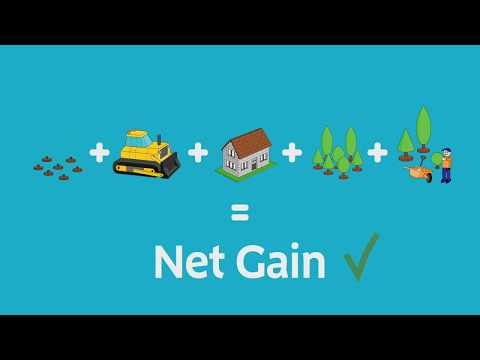

In [13]:
YouTubeVideo('loDGyw_jh1s', width=600, height=480, mute=True)

## 3. An introduction to measuring plants from space
One of the key challenges in environmental science is measuring the properties of the Earth's surface in order to understand the processes that shape it. However, even in accessible areas, carrying out this work on the ground can be expensive and difficult. One solution is to measure properties of the surface remotely
With the launch of the first LandSatSatellites such as the European Space Agency's Sentinel-2 and NASA's LandSat satellite provide regular 

In [14]:
import ipywidgets as widgets
from IPython.display import YouTubeVideo

a = widgets.IntSlider(description="Delayed", continuous_update=False)
b = widgets.IntText(description="Delayed", continuous_update=False)
c = widgets.IntSlider(description="Continuous", continuous_update=True)
d = widgets.IntText(description="Continuous", continuous_update=True)

widgets.link((a, 'value'), (b, 'value'))
widgets.link((a, 'value'), (c, 'value'))
widgets.link((a, 'value'), (d, 'value'))
widg = widgets.VBox([a,b,c,d])

display(widg)